In [ ]:
!pip install sentence-transformers

In [12]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

In [75]:
sentences = [
             'I got 4004 rank in AEEE, can I get ECE?',
             'Sentences are passed as a list of string.', 
             'The quick brown fox jumps over the lazy dog.',
             "I got 26570 rank in AEEE, will I get ECE?",
             'I have 2000 rank in AEE 2019, can I get CSE ?',
             "I have 21k rank in AEEE and my dad is rich, Can I get CSE ?"
             ]

#Sentences are encoded by calling model.encode()
sentence_embeddings = model.encode(sentences)


print(sentence_embeddings.shape)

(6, 768)


In [76]:
import numpy as np
from sentence_transformers import SentenceTransformer, util


In [77]:
vector_space_distances = np.zeros([len(sentences), len(sentences)])

In [78]:


for m in range(len(sentence_embeddings)):
    main = sentence_embeddings[m]
    for n in range(len(sentence_embeddings)):
        vector_space_distances[m][n] =  util.pytorch_cos_sim(main, sentence_embeddings[n])

In [79]:
vector_space_distances

array([[ 0.99999988,  0.100437  , -0.01768307,  0.51100433,  0.44306335,
         0.24167478],
       [ 0.100437  ,  0.99999988,  0.07961082,  0.08955355,  0.04842601,
         0.07277444],
       [-0.01768307,  0.07961082,  1.00000036, -0.04306918,  0.09801596,
         0.09777182],
       [ 0.51100433,  0.08955355, -0.04306918,  0.99999964,  0.41028121,
         0.32954639],
       [ 0.44306335,  0.04842601,  0.09801596,  0.41028121,  0.99999964,
         0.21385317],
       [ 0.24167478,  0.07277444,  0.09777182,  0.32954639,  0.21385317,
         0.99999958]])

In [80]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10, 10


In [81]:
my_xticks

['I got 4004 rank in AEEE, can I get ECE?',
 'Sentences are passed as a list of string.',
 'The quick brown fox jumps over the lazy dog.',
 'I got 26570 rank in AEEE, will I get ECE?',
 'I have 2000 rank in AEE 2019, can I get CSE ?',
 'I have 21k rank in AEEE and my dad is rich, Can I get CSE ?']

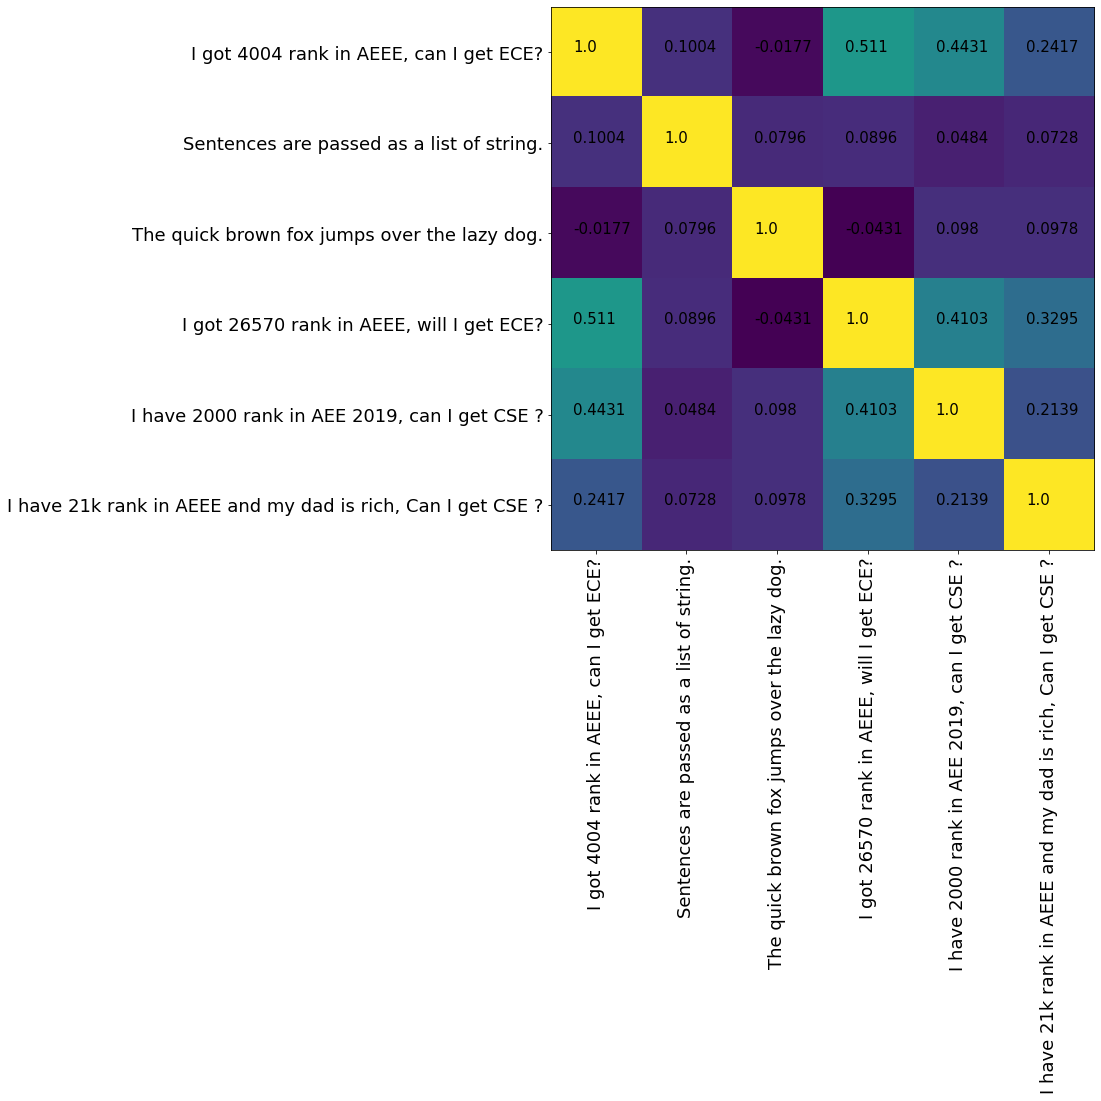

In [82]:
my_xticks = sentences
plt.xticks(np.arange(0,len(sentences)), my_xticks, fontsize = 18)
plt.yticks(np.arange(0,len(sentences)), my_xticks, fontsize = 18)

plt.xticks(rotation=90)
plt.imshow(vector_space_distances)

for m in range(len(vector_space_distances)):
    for n in range(len(vector_space_distances[n])):
        plt.text(m - 0.25 ,n, str(round(vector_space_distances[m][n], 4)), fontsize = 15)